# Data Sampling

## Import Packages

In [212]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from random import sample

## Read Data

In [213]:
df_books_final = pd.read_csv('df_books_final.csv')


In [214]:
df_books_final.head(3)

,book_id,title,description,average_rating,ratings_count,text_reviews_count,top_popular_shelves,author_ids,format_Audio,format_Digital,...,lang_tha,lang_tr,lang_tur,lang_ukr,lang_vi,lang_vie,lang_zh,length_long,length_medium,length_short
0,1882090,"Behave Yourself, Bethany Brant",A preacher's daughter with lots of curiosity a...,-1.028630,-0.059069,-0.136278,"[{'count': '1', 'name': 'mrs-withdrawn'}, {'co...",['151369'],False,False,...,False,False,False,False,False,False,False,False,True,False
1,166120,Ghosthunters And The Incredibly Revolting Ghost,A $2.99 value-priced edition of one of our bes...,-0.690046,-0.059069,-0.126186,"[{'count': '9', 'name': 'owned'}, {'count': '9...",['15873'],False,False,...,False,False,False,False,False,False,False,False,True,False
2,8608741,Attack of the Chicken Nugget Man: A National T...,Third-grader Chris Robb just can't seem to do ...,-0.597705,-0.059069,-0.102639,"[{'count': '2', 'name': 'books-i-wrote'}, {'co...",['2868520'],False,False,...,False,False,False,False,False,False,False,False,True,False


In [215]:
df_interactions_final_merged = pd.read_csv('df_interactions_final_merged.csv')

In [216]:
print(df_interactions_final_merged.shape)
df_interactions_final_merged.head(3)

(6626989, 10)


,user_id,book_id,review_id,rating,review_text_incomplete,date_added,n_votes,review_age,processed_review,sentiment
0,8842281e1d1347389f2ab93d60773d4d,23310161,f4b4b050f4be00e9283c92a814af2670,4,Fun sequel to the original.,2015-11-17 19:37:35+00:00,7.0,3248,fun sequel original,0.680800
1,8842281e1d1347389f2ab93d60773d4d,18296097,bc9cff98f54be3b2b8c5b34598a7546c,5,NaN,2015-09-21 15:16:57+00:00,NaN,3305,NaN,0.574139
2,8842281e1d1347389f2ab93d60773d4d,817720,75fd46041466ceb406b7fd69b089b9c5,5,NaN,2015-05-21 04:29:23+00:00,NaN,3429,NaN,0.574139


## Remove books not in df_books_final

In [217]:
df_books_final['book_id'].nunique()

59828

In [218]:
filtered_df = df_interactions_final_merged[df_interactions_final_merged['book_id'].isin(df_books_final['book_id'])]

In [219]:
books = df_books_final['book_id']
interaction_books = filtered_df['book_id'].unique()

In [220]:
print(interaction_books)

[23310161 18296097   817720 ... 10172885 21911244 18224172]


In [221]:
filtered_df[~filtered_df['book_id'].isin(df_books_final['book_id'])]

,user_id,book_id,review_id,rating,review_text_incomplete,date_added,n_votes,review_age,processed_review,sentiment


In [222]:
import numpy as np

# Find book IDs in interaction_books that are not in books
missing_books = interaction_books[~np.isin(interaction_books, books)]

# Display the missing book IDs
print(missing_books)

[]


In [223]:
filtered_df.shape

(5073716, 10)

## Remove interactions without review texts

In [224]:
# filtered_df = filtered_df[filtered_df['review_text_incomplete'].notna()]

In [225]:
filtered_df.shape

(5073716, 10)

## Sampling Data from Interactions

In [226]:
# Group by user to plot number of reviews per user
user_review_counts = filtered_df.groupby('user_id').size().reset_index(name='review_count')
user_review_counts_sorted = user_review_counts.sort_values(by='review_count', ascending=False)
print(user_review_counts_sorted['review_count'].describe())

count    435942.000000
mean         11.638512
std          51.215611
min           1.000000
25%           1.000000
50%           3.000000
75%           8.000000
max        7560.000000
Name: review_count, dtype: float64


<Axes: xlabel='review_count'>

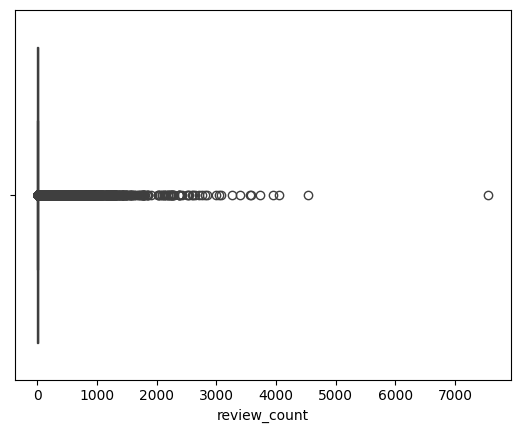

In [227]:
sns.boxplot(x='review_count', data=user_review_counts_sorted)

In [228]:
# filter users (by user_id) with less than 10 reviews
users_under_10 = user_review_counts_sorted[(user_review_counts_sorted['review_count'] <= 15) & (user_review_counts_sorted['review_count'] >= 5)]
print(users_under_10.shape)

(103988, 2)


In [229]:
# sampling half of the users with less than 10 reviews
sampled_users_df = users_under_10.sample(frac=0.2, random_state=42)
print(sampled_users_df.shape)
sampled_users_df.head()

(20798, 2)


,user_id,review_count
400768,eb51c0f47e4c90822fbd7ee0f45a0a70,7
147828,56e63772e5b53a4815a060ed2559b5bc,6
397761,e98f9ef26a0e65797399cda3c53561b7,5
121562,477748ac1c0fe13ca0ddcfe80627d875,12
47869,1c23036146a81a96781e8aee78c3560c,7


In [230]:
print(sampled_users_df['review_count'].describe())

count    20798.000000
mean         8.478748
std          3.020423
min          5.000000
25%          6.000000
50%          8.000000
75%         11.000000
max         15.000000
Name: review_count, dtype: float64


<Axes: xlabel='review_count'>

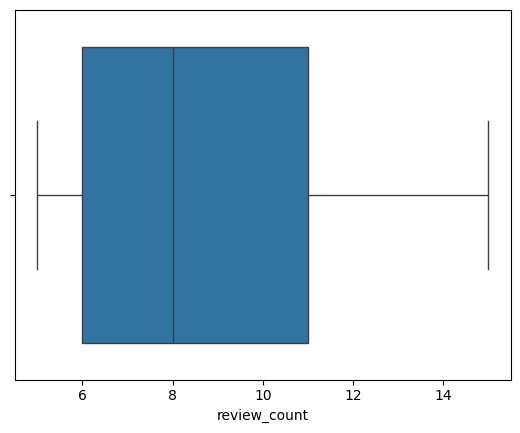

In [231]:
sns.boxplot(x='review_count', data=sampled_users_df)

In [232]:
sampled_interactions_df = filtered_df[filtered_df['user_id'].isin(sampled_users_df['user_id'])]
print(sampled_interactions_df.shape)
sampled_interactions_df.head(3)

(176341, 10)


,user_id,book_id,review_id,rating,review_text_incomplete,date_added,n_votes,review_age,processed_review,sentiment
93,06316bec7a49286f1f98d5acce24f923,47693,515dd9fa2472f63c23b8e79614ba2e7c,5,NaN,2012-06-05 16:34:47+00:00,NaN,4508,NaN,0.574139
94,06316bec7a49286f1f98d5acce24f923,30118,b9e067e3cb956265377acd987bad4d47,4,NaN,2012-06-05 02:44:17+00:00,NaN,4509,NaN,0.527973
95,06316bec7a49286f1f98d5acce24f923,144974,0437e62cf615cad6926ceef7597d1705,5,NaN,2012-06-05 02:33:59+00:00,NaN,4509,NaN,0.574139


In [233]:
sampled_interactions_df.columns

Index(['user_id', 'book_id', 'review_id', 'rating', 'review_text_incomplete',
       'date_added', 'n_votes', 'review_age', 'processed_review', 'sentiment'],
      dtype='object')

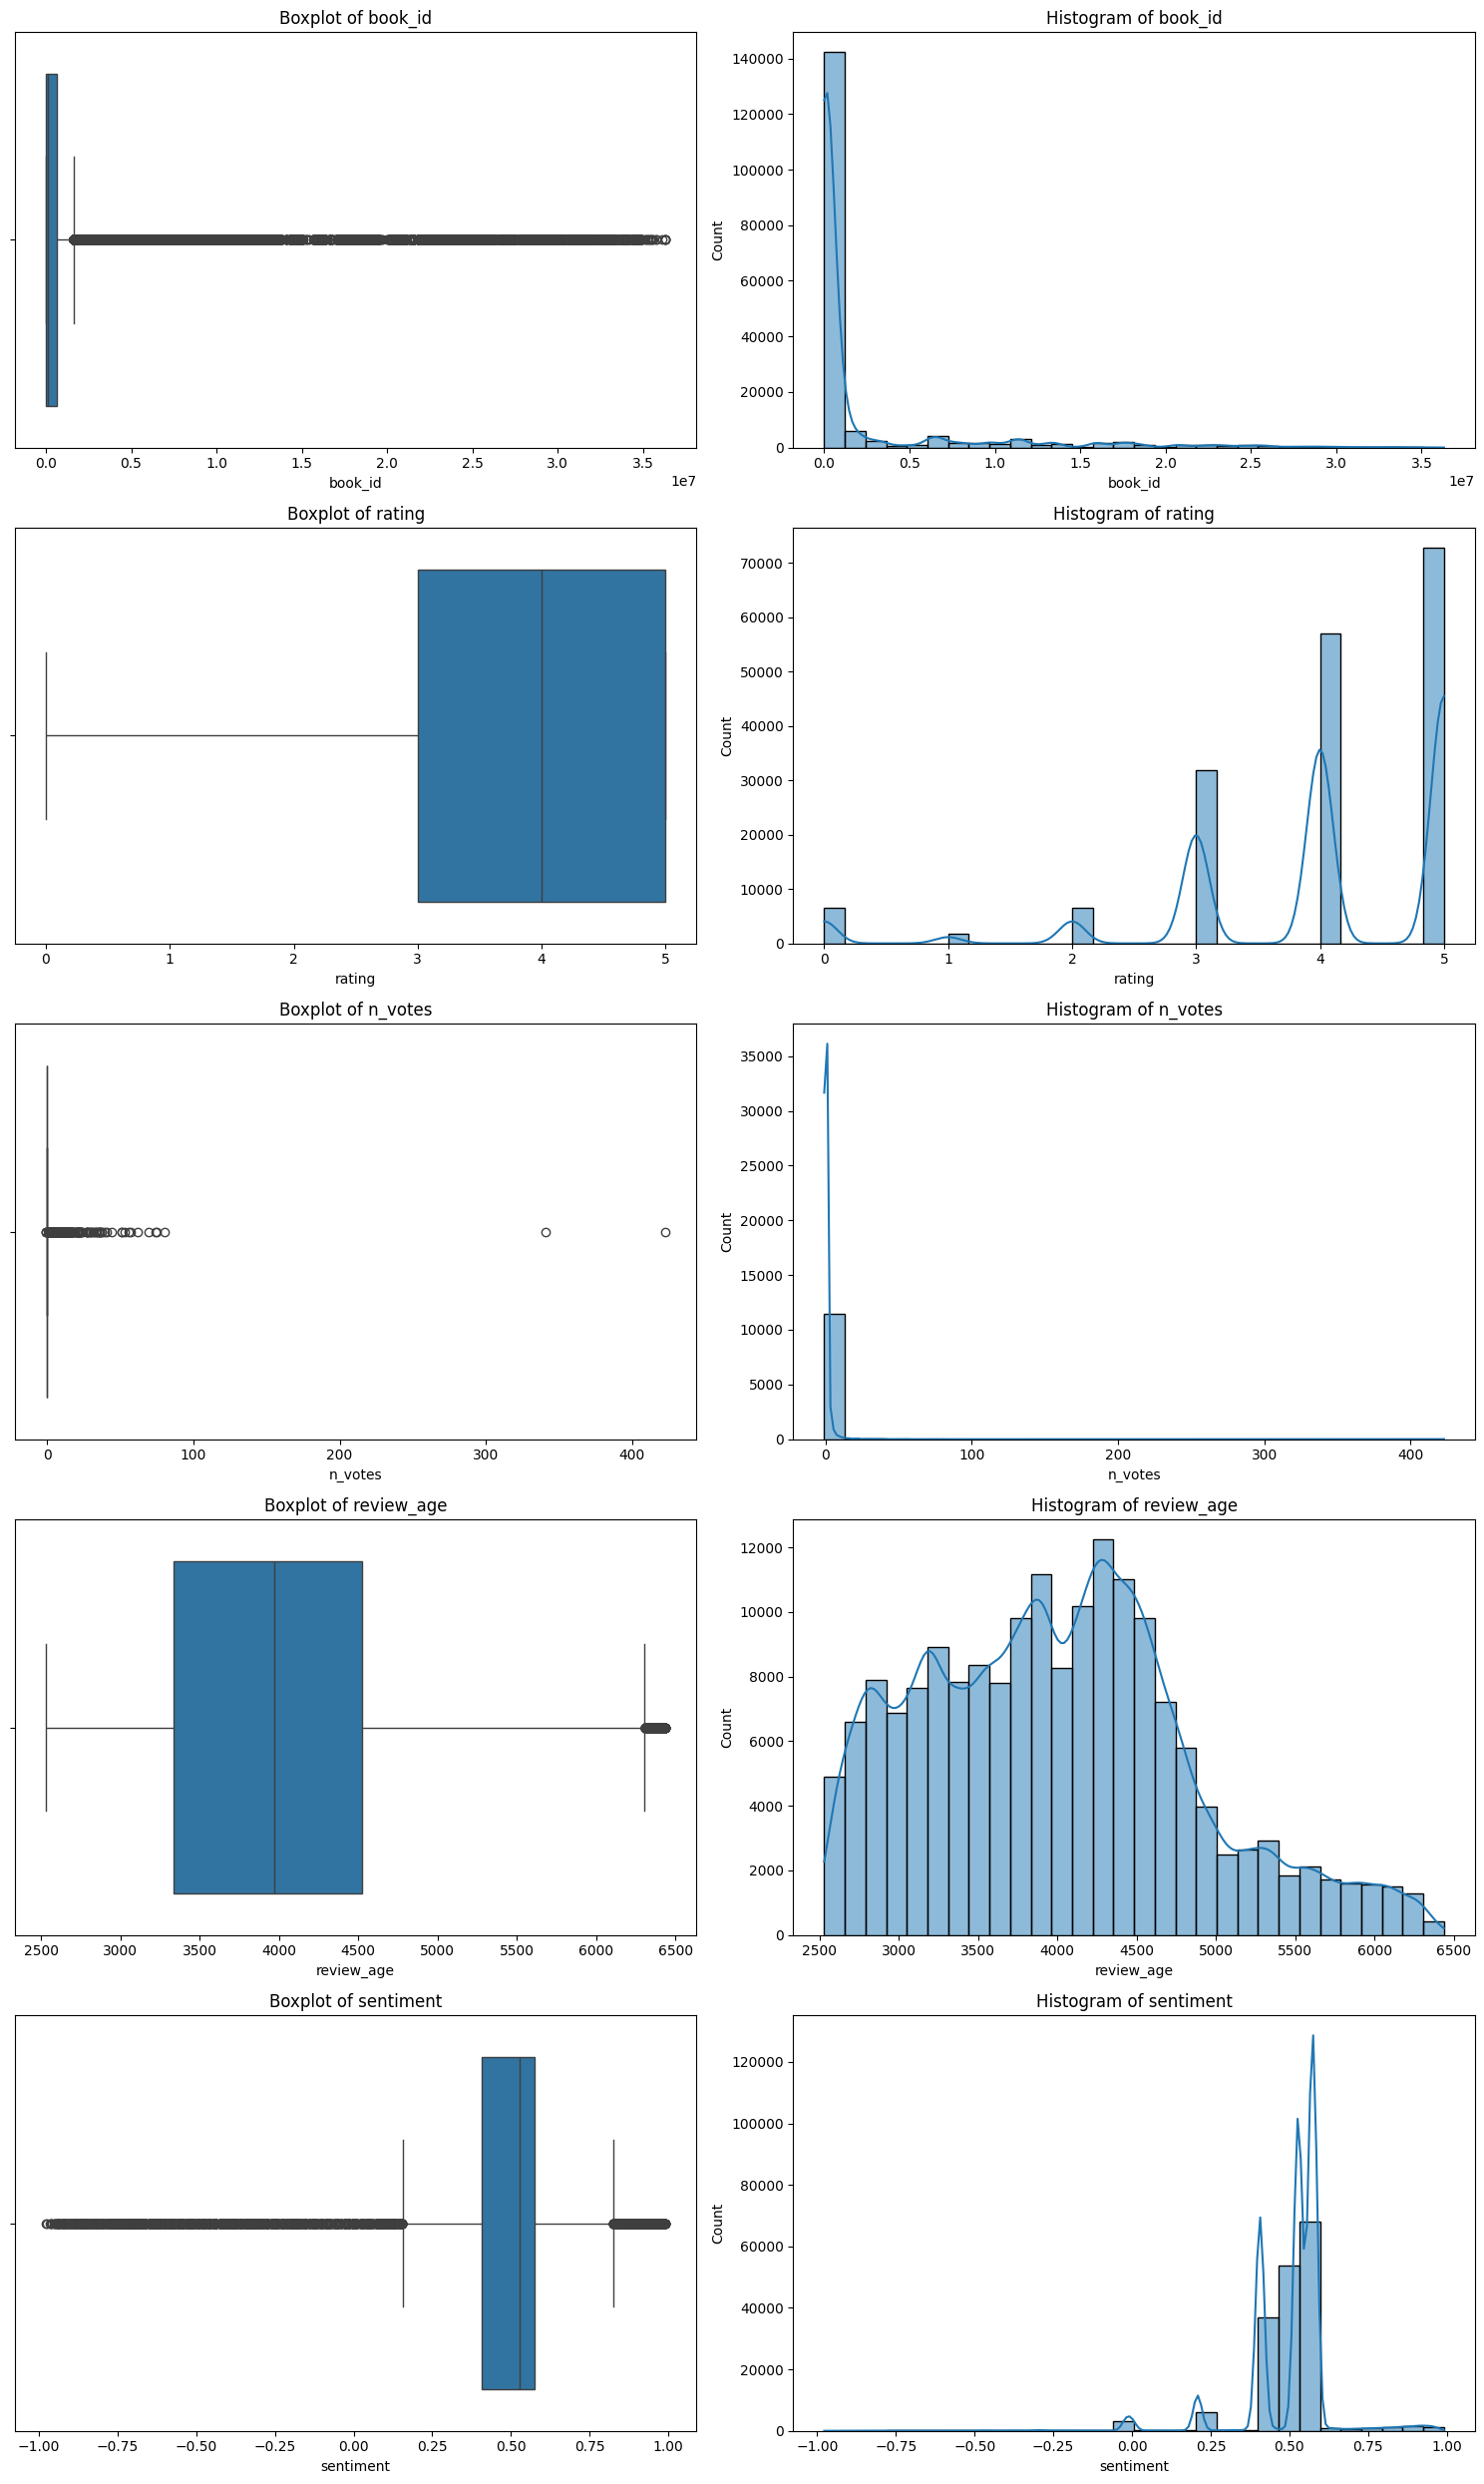

In [234]:
# Define function to plot distribution of numerical variables
def plot_distributions(df):
    # Select only numerical columns
    numerical_cols = df.select_dtypes(['number']).columns

    # Create subplots: one row for each feature, with both a boxplot and a histogram
    n_cols = len(numerical_cols)
    fig, axes = plt.subplots(n_cols, 2, figsize=(15, 5 * n_cols))
    
    for i, col in enumerate(numerical_cols):
        # Boxplot
        sns.boxplot(data=df, x=col, ax=axes[i, 0])
        axes[i, 0].set_title(f'Boxplot of {col}')
        
        # Histogram
        sns.histplot(data=df, x=col, bins=30, kde=True, ax=axes[i, 1])
        axes[i, 1].set_title(f'Histogram of {col}')
    
    plt.tight_layout()
    plt.show()

plot_distributions(sampled_interactions_df)

In [235]:
sampled_interactions_df.columns

Index(['user_id', 'book_id', 'review_id', 'rating', 'review_text_incomplete',
       'date_added', 'n_votes', 'review_age', 'processed_review', 'sentiment'],
      dtype='object')

## Removing Redundant Columns

In [236]:
sampled_interactions_df.drop(columns=['review_id', 'review_text_incomplete', 'processed_review'], inplace=True)

C:\Users\rayna\AppData\Local\Temp\ipykernel_10364\204509644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_interactions_df.drop(columns=['review_id', 'review_text_incomplete', 'processed_review'], inplace=True)


In [237]:
sampled_interactions_df.shape

(176341, 7)

# Export Sampled Interactions Data to CSV

In [238]:
sampled_interactions_df.to_csv('df_interactions_reviews_5to15.csv', index=False)

In [239]:
sampled_interactions_df[~sampled_interactions_df['book_id'].isin(df_books_final['book_id'])]

,user_id,book_id,rating,date_added,n_votes,review_age,sentiment
